In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# 1. Carregar o dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
# 2. Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Criar o modelo Naive Bayes Gaussiano
nb_model = GaussianNB(
    var_smoothing=1e-9  # parâmetro para lidar com variâncias muito pequenas (evita divisão por zero)
)

# 4. Treinar o modelo
nb_model.fit(X_train, y_train)

# 5. Avaliar o modelo
y_pred = nb_model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Acurácia: 0.9736842105263158

Relatório de Classificação:
               precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



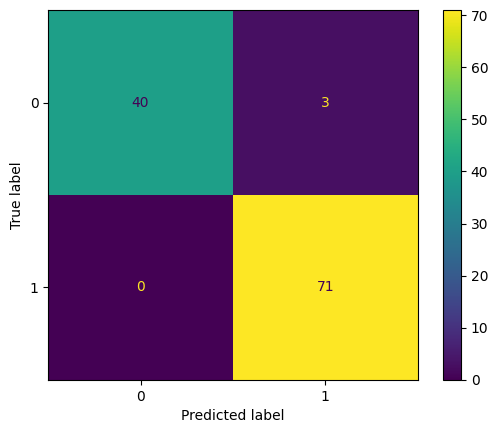

In [4]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.grid(False)
plt.show()